<a href="https://colab.research.google.com/github/kpr-03/DeepLearning_TensorFlow/blob/main/Image_classifcation_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A highly valued Fashion brand company wanted to develop a web application to classify images of different items of clothing.

Our team got the task to build a neural network to Classify images of different items of clothing.

The sample data was provided by the company(here tensorflow data is being used just for demonstartion purpose).


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# show the first training example
print(f"training sample:\n{train_data[0]}\n")
print(f"training label:\n{train_labels[0]}\n")


training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# check the shape of single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

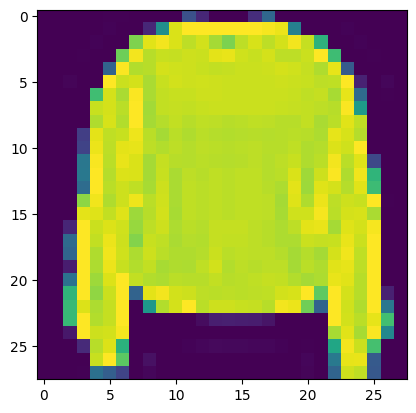

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Enter your desired label:2000


Text(0.5, 1.0, 'Coat')

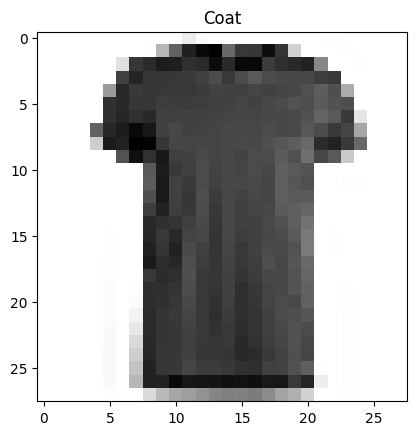

In [ ]:
# plot an example image and its label
index_of_choice= int(input("Enter your desired label:"))
plt.imshow(train_data[17],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

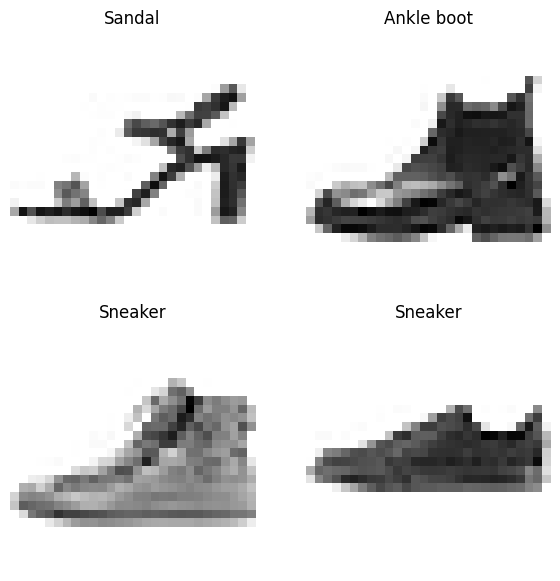

In [ ]:
# plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a multiclass classification model

For our multi-class classification model,we can use a similar architecture to oue binary classifiers,however,we're gong to have top tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.Categoricalcrossentropy()
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* output layer activation = Softmax(not sigmoid)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3663 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3025 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3043 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3030 - accuracy: 0.0979 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2915 - accuracy: 0.1055 - val_loss: 2.2398 - val_accuracy: 0.1460
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1849 - accuracy: 0.1542 - val_loss: 2.1291 - val_accurac

In [ ]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# Set random seed
tf.random.set_seed(42)

#Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax
)])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5000 - accuracy: 0.0994 - val_loss: 2.3073 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3064 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3063 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3063 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3063 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3063 - val_accuracy:

In [ ]:
# check the model summary
model_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check the min and max values of the training data
train_data.min(),train_data.max()

(0, 255)

# Neural networks prefer data to be scaled(or normalized),this means they like to have the numbers in the tensors then try to find patterns between 0 & 1.

In [ ]:
# we can get our training and testing data between 0 & 1 by dividing by maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check the min and max values of the scaled training data
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized,let's build a model to find patterns in it

# set random seed
tf.random.set_seed(42)

# Create a model(same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5696 - accuracy: 0.4256 - val_loss: 1.2937 - val_accuracy: 0.5211
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1947 - accuracy: 0.5624 - val_loss: 1.1396 - val_accuracy: 0.5958
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0838 - accuracy: 0.6147 - val_loss: 1.0500 - val_accuracy: 0.6343
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9670 - accuracy: 0.6671 - val_loss: 0.9125 - val_accuracy: 0.6783
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8566 - accuracy: 0.6995 - val_loss: 0.8558 - val_accuracy: 0.7098
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8115 - accuracy: 0.7093 - val_loss: 0.8277 - val_accuracy: 0.7071
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7829 - accuracy: 0.7193 - val_loss: 0.8144 - val_accuracy:

🔑**Note:** Neural Networks tend to prefer data in numerical form as well as scaled/normalized(numbers between 0 &1)

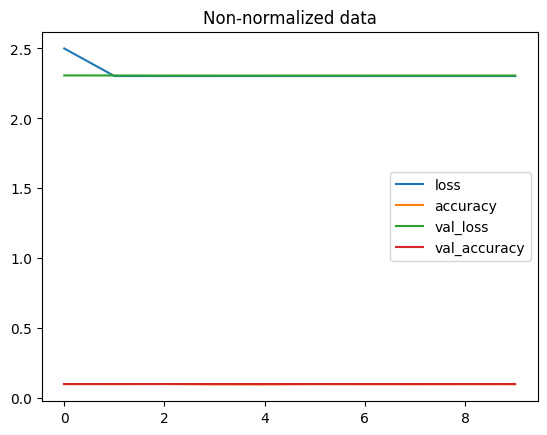

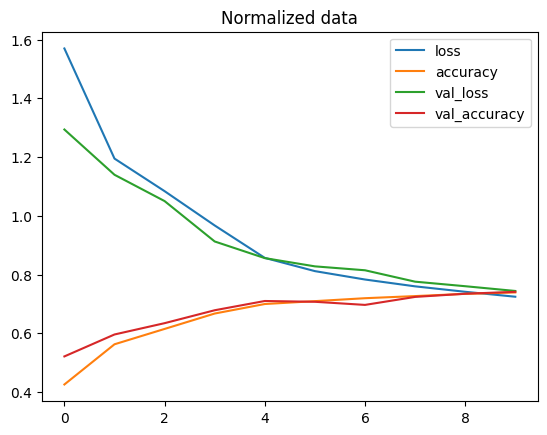

In [ ]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

> 🔑**Note:** The same model with even *slightly* different data can produce *dramatically* different results. so when you're comparing models,it's important to make sure you're comparing them on the same criteria(e.g.same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")

])

# compile model

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3* 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0149 - accuracy: 0.6561 - val_loss: 0.7276 - val_accuracy: 0.7408 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6646 - accuracy: 0.7570 - val_loss: 0.6755 - val_accuracy: 0.7599 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6238 - accuracy: 0.7690 - val_loss: 0.6645 - val_accuracy: 0.7443 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6038 - accuracy: 0.7745 - val_loss: 0.6352 - val_accuracy: 0.7604 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5907 - accuracy: 0.7789 - val_loss: 0.6275 - val_accuracy: 0.7766 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5768 - accuracy: 0.7870 - val_loss: 0.6688 - val_accuracy: 0.7690 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

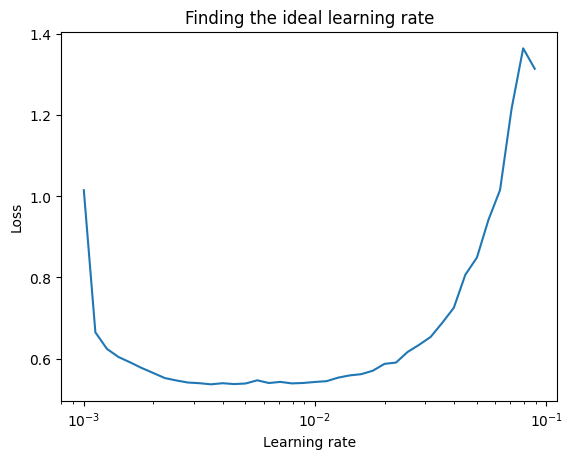

In [ ]:
#Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# let's refit the model with ideal learning rate
# set random seed
tf.random.set_seed(42)
# create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation= "relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data= (test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0617 - accuracy: 0.6039 - val_loss: 0.7483 - val_accuracy: 0.7315
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6942 - accuracy: 0.7484 - val_loss: 0.6821 - val_accuracy: 0.7533
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6307 - accuracy: 0.7700 - val_loss: 0.6339 - val_accuracy: 0.7674
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5980 - accuracy: 0.7819 - val_loss: 0.6105 - val_accuracy: 0.7731
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5780 - accuracy: 0.7902 - val_loss: 0.6062 - val_accuracy: 0.7778
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5612 - accuracy: 0.7975 - val_loss: 0.5970 - val_accuracy: 0.7844
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5524 - accuracy: 0.8019 - val_loss: 0.5985 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Improve its results(by training  it for longer or changing the architecture)
* save and export it for use in an application

Let's go through top 2...

In [20]:
# create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true,y_pred,classes=None,figsize =(10,10),text_size=15):
  # create the confusion matrix
  cm = confusion_matrix(y_true,tf.round(y_pred))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes =cm.shape[0]

  # Let's prettify it
  fig,ax = plt.subplots(figsize=figsize)

  # create a matrix plot
  cax= ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title = "confusion matrix",
        xlabel="Predicted Label",
        ylabel= "True label",
        xticks= np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max()+cm.min())/2.

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size=text_size)

In [21]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [24]:
# Make some predictions with our model
y_probs  = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[9.51813883e-04, 2.85129891e-14, 1.56375118e-05, 5.65621758e-06,
        7.14136042e-11, 1.44056842e-01, 1.79809085e-05, 7.03330785e-02,
        1.55387431e-01, 6.29231513e-01],
       [1.18089607e-03, 6.34611775e-13, 8.40259433e-01, 1.10388982e-07,
        2.73956750e-02, 1.04153110e-16, 1.30496815e-01, 1.62995402e-25,
        6.67074637e-04, 6.89093490e-16],
       [9.13368808e-07, 9.97288525e-01, 1.23621351e-06, 7.37748196e-05,
        2.62256199e-03, 1.86241471e-13, 1.29327864e-05, 3.52485191e-16,
        9.55710858e-11, 6.49651109e-17],
       [1.31037705e-05, 9.94270027e-01, 1.21253888e-05, 7.37752125e-04,
        4.86615160e-03, 1.84287828e-11, 1.00803569e-04, 2.57467658e-13,
        9.22262977e-09, 2.71994917e-14],
       [1.04518861e-01, 2.27513766e-07, 2.10562825e-01, 4.94345557e-03,
        4.16558310e-02, 2.29366482e-12, 5.71058393e-01, 5.39816342e-15,
        6.72603324e-02, 7.21559687e-11]], dtype=float32)

🔑**Note:**Remember to make predictions on the same kind of data your model was trained on(e.g.If your model was trained on normalized data,you'will want to make predictions on normalized data

In [27]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([9.5181388e-04, 2.8512989e-14, 1.5637512e-05, 5.6562176e-06,
        7.1413604e-11, 1.4405684e-01, 1.7980909e-05, 7.0333079e-02,
        1.5538743e-01, 6.2923151e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [28]:
# convert all of the prediction probabilities into integers
y_preds =y_probs.argmax(axis=1)

#view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[647,   2,  20,  77,   7,   5, 227,   0,  15,   0],
       [  0, 946,   9,  32,  10,   1,   2,   0,   0,   0],
       [  5,   4, 686,   8, 207,   0,  86,   0,   4,   0],
       [ 26,  12,  11, 815,  58,   2,  72,   0,   4,   0],
       [  0,   4, 116,  18, 822,   0,  39,   0,   1,   0],
       [  1,   0,   0,   1,   0, 905,   0,  45,   9,  39],
       [109,   6, 173,  41, 204,   2, 458,   0,   7,   0],
       [  0,   0,   0,   0,   0,  35,   0, 903,   3,  59],
       [  6,   1,  27,   7,   3,   4,  30,   2, 919,   1],
       [  0,   0,   0,   0,   0,  22,   0,  35,  10, 933]])

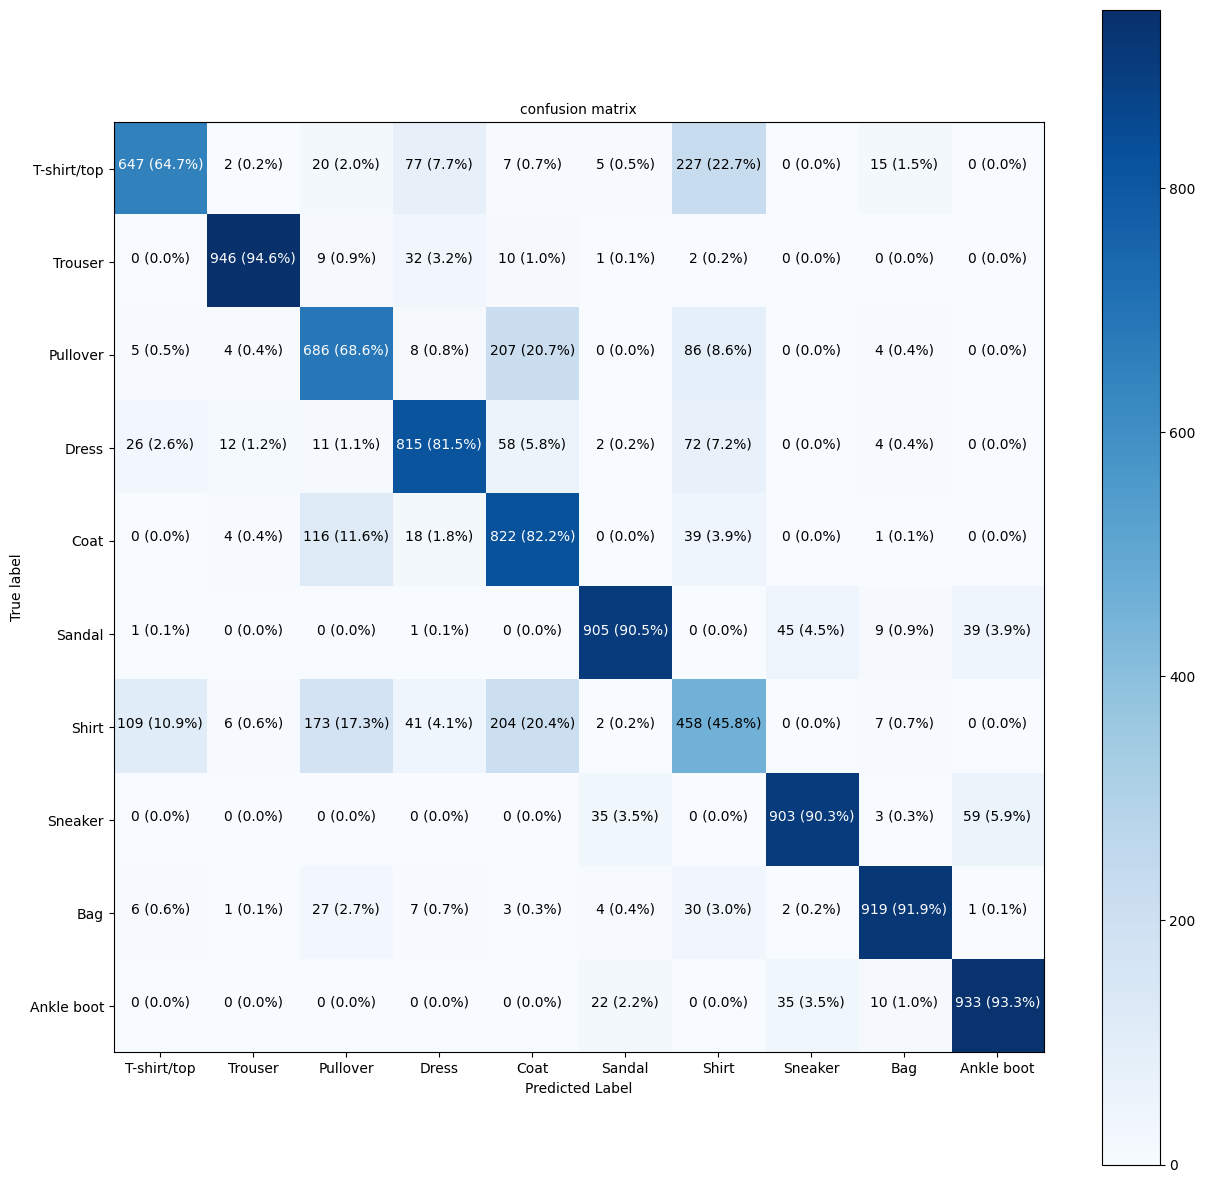

In [30]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label


In [36]:
import random

def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random image,plots it and labels it with a prediction and truth label.

  """
  # set mup random integer
  i=random.randint(0,len(images))

  # create predictions and targets
  target_image =images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  # change the color of tyhe titles depending on if the prediction is right or wrong
  if pred_label ==  true_label:
    color = "green"
  else:
    color = "red"
  # add xlabel information (prediction/true label)
  plt.xlabel("Pred: {}{:2.0f}% (True:{})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
              color= color) # Set the color to green or red based on if prediction is right or wrong




1/1 [==============================] - 0s 22ms/step


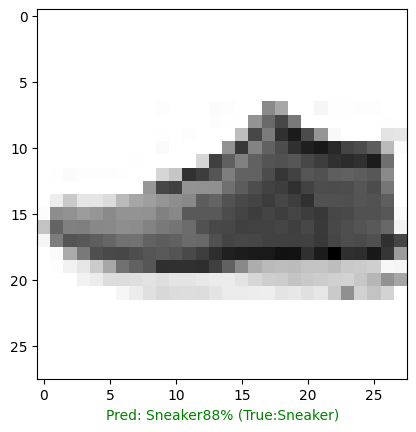

In [51]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns ismour model learning?

In [52]:
# Find the layers of our most reent model
model_14.layers

In [54]:
# Extarct particular layer
model_14.layers[1]

In [56]:
# get the patterns of a layer in our network
weights,biases = model_14.layers[1].get_weights()

#shapes
weights,weights.shape

(array([[-0.2995977 ,  0.06911346,  0.03714171, -0.66080546],
        [-0.74309653,  0.37279215,  0.53108615, -0.20997778],
        [-0.02265791, -0.61378014,  0.5725993 , -1.4535936 ],
        ...,
        [ 0.04380158, -1.2072797 ,  0.0054824 , -0.13766158],
        [ 0.28523684, -0.48737118, -0.7514186 ,  0.17604522],
        [ 0.14291966, -0.520983  ,  0.21626757, -0.15089561]],
       dtype=float32),
 (784, 4))

In [57]:
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out bias veactor...

In [58]:
# Biases and biases shapes
biases,biases.shape

(array([-0.41906786,  1.0162745 ,  1.3436246 ,  0.6383397 ], dtype=float32),
 (4,))

Every neuron has bias vector each of these is paired with weights matrix.

The bias vector gets initialized as zeros(at least in the case of TensorFlow Sense Layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [59]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


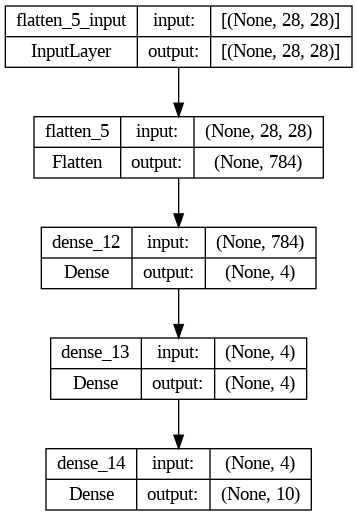

In [60]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

**Conclusion:** The Neural network model was able to identify the images of different clothing items successfully.

However,a little improvement in dataset is required(like tshirts and shirts can be clubbed together..) for more better results
or,we can gather more data to train our model.